# Interactive entropy and information calculations -- Demo Notebook

## Outline

0. Imports
1. Create Data via Interactive Interface
2. Perform soft-binning and entropy / information calculations

## 0. Setup

### 0.1. Imports

In [1]:
## Set the PYTHON package path
import os, sys
package_root = os.path.abspath('../src/')
if package_root not in sys.path:
    sys.path.insert(0, package_root)

#package_root

In [2]:
## Import all routines from the new_working_codebase/__init__.py file
from nam_entropy import *

### 0.2. Fix Randomness

In [3]:
RANDOM_SEED = 42
set_all_random_seeds(RANDOM_SEED)

All random seeds set to 42 (deterministic mode)


## 1. Create Data via Interactive Interface 

In [4]:
sampler = SimpleDistribution2DSampler(save_path="./my_2d_samples.csv")
sampler.display()

In [5]:
## Get the 2D sampler settings and data
settings_with_data = sampler.get_all_settings(include_data=True)

## Extract the Pytorch data
pytorch_sample_data_dict = settings_with_data['data']['pytorch_data']

## Alias the relevant variables
index_tensor = pytorch_sample_data_dict['index_tensor']
data_tensor = pytorch_sample_data_dict['data_tensor']
label_list = pytorch_sample_data_dict['label_list']
label_to_label_index_dict = pytorch_sample_data_dict['label_to_label_index_dict']


## Get the color data from the 2D sampler
sampler_colors = settings_with_data['data']['colors']  # List of RGBA tuples
#sampler_colors_dict = settings_with_data['data']['colors_dict']  # Dict mapping labels to colors


In [6]:
#settings_with_data

In [7]:
index_tensor

tensor([0, 0, 0,  ..., 1, 1, 1])

## 2. Perform soft-binning and entropy / information calculations

### 2.1. Run all computations

In [8]:
## Compute the entropies and mutual information
output_dict = compute_all_entropy_measures(
    data_embeddings_tensor=data_tensor,
    data_label_indices_tensor=index_tensor,
    label_list=label_list,
    n_bins=10,
    n_heads=1,
    bin_type="uniform",
    dist_fn="euclidean",
    smoothing_fn="softmax",
    smoothing_temp=1.0,                            
)

In [9]:
#output_dict.keys()

In [10]:
#output_dict['intermediate_data'].keys()

In [11]:
#output_dict['output_metrics'].keys()

In [12]:
output_dict['output_metrics']

{'entropy': 2.2384517192840576,
 'conditional_entropy': 2.199700713157654,
 'mutual_information': 0.03875100612640381,
 'label_entropy_dict': {'total_population': 2.2384517192840576,
  'Distribution 1': 2.1654717922210693,
  'Distribution 2': 2.2339296340942383}}

### 2.2. Get the bins and probability distributions out from the entropy calculations

In [13]:
## Extract the intermediate data from the entropy calculation
intermediate_data_dict = output_dict['intermediate_data']
prob_dist_for_total_population_tensor = intermediate_data_dict['prob_dist_for_total_population_tensor']
prob_dist_by_label_tensor = intermediate_data_dict['prob_dist_by_label_tensor']


In [14]:
prob_dist_bins = output_dict['intermediate_data']['tmp_bins']  ## Remove the heads
prob_dist_bins__no_heads = prob_dist_bins.squeeze(1)
prob_dist_bins__no_heads.shape

torch.Size([10, 2])

### 2.3. Visualize the data distrubution and bins

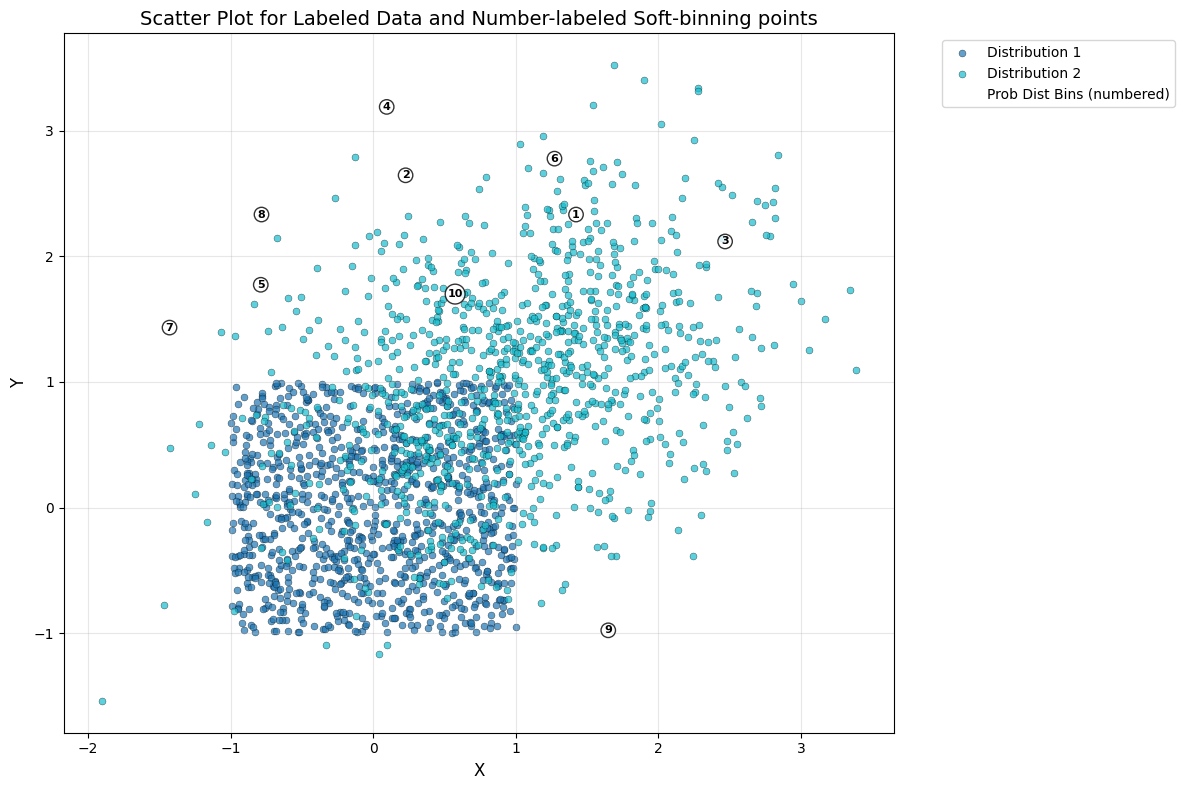

In [15]:
fig, ax = plot_2d_scatter_with_bins(
    data_tensor=data_tensor,
    index_tensor=index_tensor,
    label_list=label_list,
    bins=prob_dist_bins.squeeze(1),
    bins_mode='numbers',  # X markers for bins
    title='Scatter Plot for Labeled Data and Number-labeled Soft-binning points'
)

### 2.3. Define the barplot routine to visualize the probability tensor


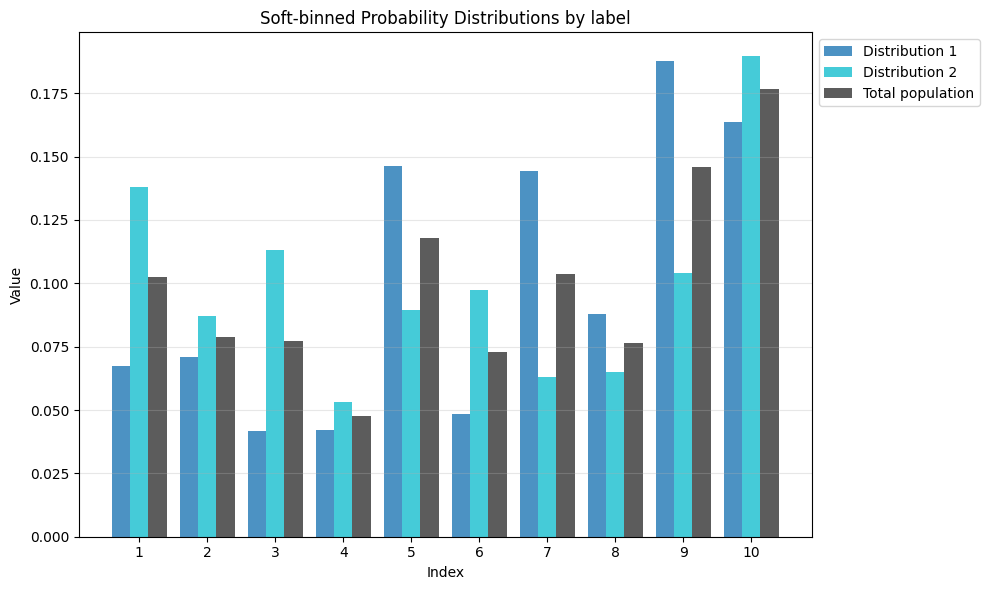

In [16]:
## Make the display tensor and labels
display_label_list = label_list + ['Total population']
display_tensor = torch.cat([prob_dist_by_label_tensor, prob_dist_for_total_population_tensor.unsqueeze(0)], dim=0)
display_colors = sampler_colors + [(0.2, 0.2, 0.2, 0.2)]  # Dark Grey for total

## Plot the probability distributions
plot_tensor_bars(display_tensor, title='Soft-binned Probability Distributions by label', 
                 separate_plots=False, labels=display_label_list, row_colors=display_colors, start_index=1)